<b>Required Imports</b>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.utils import shuffle

Since I am using google colab therefore i write the following: (For jupyter users can simply skip the next 2 cells)

In [0]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
data=pd.read_csv('/content/drive/My Drive/Datasets/Logistic regression/ecommerce_data.csv')

Importing the data in csv format

In [0]:
df=pd.read_csv('/content/drive/My Drive/Datasets/Logistic regression/ecommerce_data.csv')
data=df.values
X=data[:,:-1]
print(X[:,2])

[6.57509946e-01 5.68571234e-01 4.22459972e-02 1.65979338e+00
 2.01474485e+00 5.12447387e-01 1.44032710e+00 3.52602331e-02
 1.49076409e+00 5.83752105e-03 2.04604049e+00 9.55889466e-01
 1.59377604e-01 7.69272093e-01 2.26271266e-01 9.88228603e-01
 1.60582973e-01 1.15029585e-01 4.83714044e-01 1.82400584e-01
 2.71692558e-01 2.96118172e-01 9.96240124e-01 1.94535712e+00
 2.93628762e-02 8.73551048e-02 1.90816589e+00 1.19630359e-01
 1.00013381e-01 7.07463235e-01 4.46573478e-02 8.88626140e-01
 2.08264407e+00 2.09047184e+00 1.11606573e+00 1.39738444e-02
 2.54083736e-01 8.79175145e-01 1.20889141e+00 6.20071009e-02
 1.66427128e+00 1.09204237e+00 1.88662056e-01 2.58902814e-01
 2.16297523e-01 6.81184764e-02 1.21636593e+00 7.75308304e-02
 2.76065732e+00 4.13759695e-01 1.16767024e+00 1.21181900e+00
 9.18526053e-01 1.55500429e+00 4.49372855e-01 5.43215224e-01
 2.22325723e+00 1.04567317e+00 2.89637013e-01 8.36483998e-01
 1.99600973e-01 7.14921958e-01 1.23716869e+00 8.57807175e-01
 1.90354097e+00 6.885844

Get_data()- It preprocesses the data as we want. We also did one hot-encoding.<br>
**Preparing data**

In [0]:
def get_data():
  df=pd.read_csv('/content/drive/My Drive/Datasets/Logistic regression/ecommerce_data.csv')
  data=df.to_numpy()
  X=data[:,:-1]
  Y=data[:,-1]
  X[:,1]=(X[:,1]-X[:,1].mean())/X[:1].std()
  X[:,2]=(X[:,2]-X[:,2].mean())/X[:2].std()
  N,D=X.shape
  X2=np.zeros((N,D+3))
  X2[:,0:(D-1)]=X[:,0:(D-1)]
  for n in range(N):
    t=int(X[n,D-1])
    X2[n,t+D-1]=1
  Z=np.zeros((N,4))
  Z[np.arange(N),X[:,D-1].astype(np.int32)]=1
  assert(np.abs(X2[:,-4:]-Z).sum()< 10e-10)
  return X2,Y

Taking all values with binary values (0 or 1)

In [0]:
def get_binary_data():
  X,Y=get_data()
  X2=X[Y<=1]
  Y2=Y[Y<=1]
  return X2,Y2

In [0]:
X,Y=get_binary_data()
X,Y=shuffle(X,Y)

In [0]:
Xtrain=X[:-100]
Ytrain=Y[:-100]
Xtest=X[-100:]
Ytest=Y[-100:]

In [0]:
print(Ytrain.shape,Ytest.shape)

(298,) (100,)


In [0]:
N,D=X.shape
W=np.random.randn(D)
b=0

Defining a function for calculation of sigmoid and forward feed

In [0]:
def sigmoid(a):
  return 1/(1/1+np.exp(-a))

def forward(X,W,b):
  return sigmoid(X.dot(W)+b)

To calculate classification rate (Score)

In [0]:
def classification_rate(Y,P):
  return np.mean(Y==P)

Cost Function

In [0]:
def entropy(T,pY):
  return -np.mean(T*np.log(pY).T+(1-T)*np.log(1-pY))

Gradient Descent

In [0]:
train_costs=[]
test_costs=[]
learning_rate=0.001
for i in range(10000):
  pYtrain=forward(Xtrain,W,b)
  pYtest=forward(Xtest,W,b)
  ctrain=entropy(Ytrain,pYtrain)
  ctest=entropy(Ytest,pYtest)
  train_costs.append(ctrain)
  test_costs.append(ctest)
  W-=learning_rate*Xtrain.T.dot(pYtrain-Ytrain)
  b-=learning_rate*(pYtrain-Ytrain).sum()
  if i%1000==0:
    print(i,ctrain,ctest)



0 1.1850391322273182 1.1711719547962645
1000 0.18416744736413637 0.19315769222818208
2000 0.1826046106476459 0.19083966019507292
3000 0.18248313950851452 0.1905165766240617
4000 0.1824710071060345 0.1904428101360464
5000 0.18246970988223157 0.1904215981304224
6000 0.1824695681885457 0.19041490083072296
7000 0.18246955260352768 0.19041271395705395
8000 0.18246955088537567 0.19041199162228017
9000 0.18246955069581622 0.19041175211027273


In [0]:
print("Final train classification_rate ",classification_rate(Ytrain,np.round(pYtrain)))
print("Final test classification_rate ",classification_rate(Ytest,np.round(pYtest)))


Final train classification_rate  0.9697986577181208
Final test classification_rate  0.96


Plotting the train-costs and test-costs

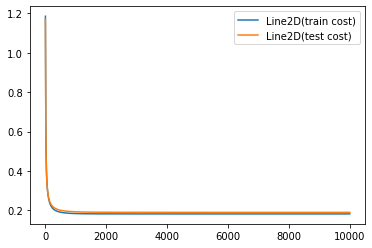

In [0]:
legend1,=plt.plot(train_costs,label='train cost')
legend2,=plt.plot(test_costs,label='test cost')
plt.legend([legend1,legend2])
plt.show()
